## MODEL Building (Under sampling dataset)

In [1]:
#importing modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,  auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing under sampling dataset
train_df = pd.read_csv(Path('Resources/cleaned-data/2019loans_us.csv'))
test_df = pd.read_csv(Path('Resources/cleaned-data/2020Q1loans_us.csv'))

In [3]:
# looking train data
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N,low_risk
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N,low_risk
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N,low_risk
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N,low_risk
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N,low_risk


In [4]:
# looking test data
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N,low_risk
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N,low_risk
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N,low_risk
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N,low_risk
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N,low_risk


In [5]:
train_df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'm

In [6]:
#shape of training data
train_df.shape

(12180, 84)

In [7]:
#shape of test data
test_df.shape

(4702, 84)

In [8]:
#train_df.info()

#removing unnessary columns from training and testing set
train_df.drop(columns=['Unnamed: 0', 'index'], inplace=True)
test_df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [9]:
train_df['loan_status'].value_counts()

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

## Train and test set

In [10]:
# create feature matrix (X) #selecting all columns except 'loan_status'
X_train=train_df.drop('loan_status', axis=1) 
X_test=test_df.drop('loan_status', axis=1) 

# create response vector (y) ##selecting 'loan_status'
y_train=train_df['loan_status'].values  
y_test=test_df['loan_status'].values  

In [11]:
y_train

array(['low_risk', 'low_risk', 'low_risk', ..., 'high_risk', 'high_risk',
       'high_risk'], dtype=object)

## Converting categorical data to numeric

In [12]:
# Convert categorical data to numeric
X_train_dumy=pd.get_dummies(X_train)
X_test_dumy=pd.get_dummies(X_test)

In [13]:
#shape of test and train after pd.get_dummies
print(X_train_dumy.shape)
print(X_test_dumy.shape)

(12180, 92)
(4702, 91)


In [14]:
#adding the missing columns in test data(no dept_settlement_flag)
X_test_dumy['debt_settlement_flag_Y']=0

In [15]:
#shape of test and train after pd.get_dummies
print(X_train_dumy.shape)
print(X_test_dumy.shape)

(12180, 92)
(4702, 92)


## Scaling using StandardScalar

In [16]:
 # Converting output labels to 0 and 1
y_train_label = LabelEncoder().fit_transform(y_train)
y_train_label

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
 # Converting output labels to 0 and 1
y_test_label = LabelEncoder().fit_transform(y_test)
y_test_label

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
# Create a StandardScaler() model and fit it to the training data
X_scaler = StandardScaler().fit(X_train_dumy)

In [19]:
# Transform the training and testing data by using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train_dumy)
X_test_scaled = X_scaler.transform(X_test_dumy)

In [20]:
#shape of test and train after standard scalar
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(12180, 92)
(4702, 92)


## LogisticRegression

In [21]:
# Creating a Logistic Regression model on the scaled data
lr= LogisticRegression()

# Fit the model to the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
#printing the accuracy score
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

Training Score: 0.710919540229885
Testing Score: 0.7598894087622289


In [23]:
#score of training set using cross_val_score
cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

array([0.6818555 , 0.67364532, 0.7089491 , 0.72003284, 0.70648604])

In [24]:
#predection on the train set and confusion matrix
#cross_val_predict performs k-fold cross-validation but instead of returning evaluation scores it return the prediction made in each fold.
y_train_pred=cross_val_predict(lr, X_train_scaled, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[3866, 2224],
       [1452, 4638]])

In [25]:
#predection on the test set and confusion matrix
y_pred=lr.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[1764,  587],
       [ 542, 1809]])

In [26]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high_risk       0.76      0.75      0.76      2351
    low_risk       0.76      0.77      0.76      2351

    accuracy                           0.76      4702
   macro avg       0.76      0.76      0.76      4702
weighted avg       0.76      0.76      0.76      4702



In [95]:
#roc curve
y_proba_lr = lr.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_lr)

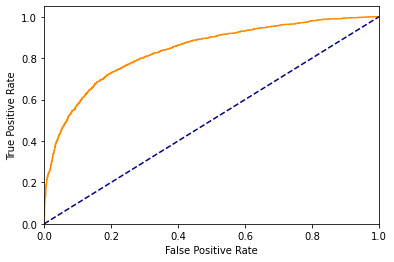

In [96]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [97]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.8379492622034189

## KNeighbors Classifier

In [27]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
#printing the accuracy score
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')

Training Score: 0.7874384236453202
Testing Score: 0.5431731178222033


In [29]:
# Loop through different k values to find which has the highest accuracy.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.525
k: 3, Train/Test Score: 0.787/0.543
k: 5, Train/Test Score: 0.737/0.553
k: 7, Train/Test Score: 0.711/0.561
k: 9, Train/Test Score: 0.705/0.571
k: 11, Train/Test Score: 0.696/0.569
k: 13, Train/Test Score: 0.689/0.576
k: 15, Train/Test Score: 0.679/0.575
k: 17, Train/Test Score: 0.678/0.570
k: 19, Train/Test Score: 0.671/0.578


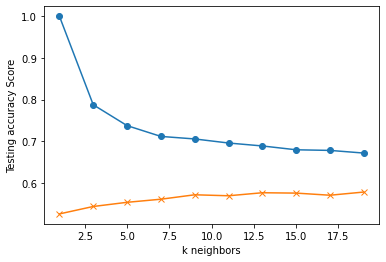

In [30]:
#plotting knn scores
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
 # Note that k: 7 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.562


In [32]:
#score of training set using cross_val_score
cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

array([0.55213465, 0.5771757 , 0.60303777, 0.59318555, 0.59975369])

In [33]:
#predection on the train set and confusion matrix
#cross_val_predict performs k-fold cross-validation but instead of returning evaluation scores it return the prediction made in each fold.
y_train_pred=cross_val_predict(knn, X_train_scaled, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[3989, 2101],
       [2953, 3137]])

In [34]:
#predection on the test set and confusion matrix
y_pred_knn=lr.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_knn)

array([[1764,  587],
       [ 542, 1809]])

In [35]:
#classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

   high_risk       0.76      0.75      0.76      2351
    low_risk       0.76      0.77      0.76      2351

    accuracy                           0.76      4702
   macro avg       0.76      0.76      0.76      4702
weighted avg       0.76      0.76      0.76      4702



In [36]:
#roc curve
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_pred_proba)

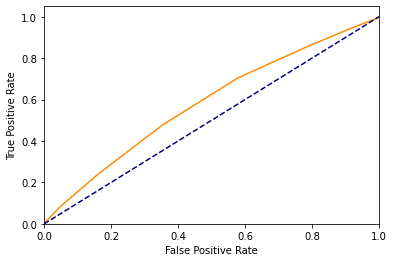

In [37]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [38]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.5825726258191081

## Support Vector Classifier

In [98]:
# Support vector machine linear classifier
svc=SVC(kernel='linear', probability=True)
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [99]:
#printing the accuracy score
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

Training Score: 0.7233169129720853
Testing Score: 0.7528711186729051


In [41]:
#score of training set using cross_val_score
cross_val_score(svc, X_train_scaled, y_train, cv=5, scoring='accuracy')

array([0.68678161, 0.7089491 , 0.71921182, 0.72865353, 0.72413793])

In [42]:
#predection on the train set and confusion matrix
#cross_val_predict performs k-fold cross-validation but instead of returning evaluation scores it return the prediction made in each fold.
y_train_pred=cross_val_predict(svc, X_train_scaled, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[3671, 2419],
       [1070, 5020]])

In [43]:
#predection on the test set and confusion matrix
y_pred_svc=svc.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_svc)

array([[1593,  758],
       [ 404, 1947]])

In [44]:
#classification report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

   high_risk       0.80      0.68      0.73      2351
    low_risk       0.72      0.83      0.77      2351

    accuracy                           0.75      4702
   macro avg       0.76      0.75      0.75      4702
weighted avg       0.76      0.75      0.75      4702



In [100]:
#roc curve
y_proba_svc = svc.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_svc)

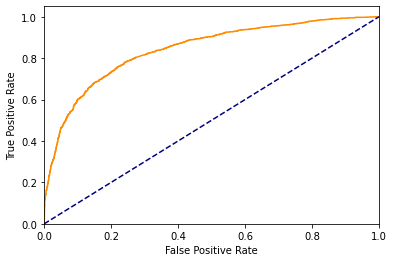

In [101]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [102]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.8418751190702131

### Tuning hyperparamaters  using Grid Search CV

In [46]:
#### Using GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.005]}
grid_svc = GridSearchCV(svc, param_grid, cv=3, verbose=1, n_jobs=-1)

In [47]:
grid_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.005]},
             verbose=1)

In [49]:
# List the best parameters for this dataset
print(grid_svc.best_params_)

{'C': 5, 'gamma': 0.0001}


In [50]:
# List the best score
print(grid_svc.best_score_)

0.7067323481116584


In [52]:
#best estimator
svc_b=grid_svc.best_estimator_
svc_b

SVC(C=5, gamma=0.0001, kernel='linear')

In [57]:
# Score the hypertuned model on the test dataset
svc_b.score(X_test_scaled, y_test)

0.735431731178222

In [54]:
# Make predictions with the hypertuned model
pred = svc_b.predict(X_test_scaled)
confusion_matrix(y_test, pred)

array([[1512,  839],
       [ 405, 1946]])

In [55]:
#classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

   high_risk       0.79      0.64      0.71      2351
    low_risk       0.70      0.83      0.76      2351

    accuracy                           0.74      4702
   macro avg       0.74      0.74      0.73      4702
weighted avg       0.74      0.74      0.73      4702



### Tuning hyperparamaters  using Randomized Search CV

In [130]:
#### Using RandomizedSearchCV
param_rand = {
    'C' : np.arange(0, 100, 1),
    'gamma': np.arange(0, 0.01, .0001),
}
rand_svc = RandomizedSearchCV(svc, param_rand, cv=3, n_iter=100, random_state=1, verbose=1, n_jobs=-1)

In [ ]:
rand_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [49]:
# List the best parameters for this dataset
print(rand_svc.best_params_)

{'C': 5, 'gamma': 0.0001}


In [50]:
# List the best score
print(rand_svc.best_score_)

0.7067323481116584


In [52]:
#best estimator
svc_best=rand_svc.best_estimator_
svc_best

SVC(C=5, gamma=0.0001, kernel='linear')

In [57]:
# Score the hypertuned model on the test dataset
svc_best.score(X_test_scaled, y_test)

0.735431731178222

In [54]:
# Make predictions with the hypertuned model
predic = svc_best.predict(X_test_scaled)
confusion_matrix(y_test, predic)

array([[1512,  839],
       [ 405, 1946]])

In [55]:
#classification report
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

   high_risk       0.79      0.64      0.71      2351
    low_risk       0.70      0.83      0.76      2351

    accuracy                           0.74      4702
   macro avg       0.74      0.74      0.73      4702
weighted avg       0.74      0.74      0.73      4702



## Decision Tree 

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [46]:
#printing the accuracy score
print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.4980859208847299


In [47]:
#predection on the test set and confusion matrix
y_pred_dt=svc.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_dt)

array([[1593,  758],
       [ 404, 1947]])

In [48]:
#classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

   high_risk       0.80      0.68      0.73      2351
    low_risk       0.72      0.83      0.77      2351

    accuracy                           0.75      4702
   macro avg       0.76      0.75      0.75      4702
weighted avg       0.76      0.75      0.75      4702



[0.00940899 0.01840307 0.06310029 0.00958614 0.0146713  0.00075065
 0.00410596 0.00538662 0.00124964 0.01246064 0.00789684 0.01682673
 0.02693455 0.01962212 0.0161742  0.10906446 0.09317775 0.02853239
 0.         0.         0.17116146 0.00058891 0.         0.
 0.00410742 0.01005849 0.00297149 0.00594474 0.00256592 0.00405664
 0.01161688 0.00868639 0.01251028 0.0043054  0.00804155 0.01094208
 0.01010159 0.00855881 0.00839542 0.00372309 0.00392445 0.00702405
 0.01481718 0.01142025 0.00855103 0.00027251 0.         0.01673569
 0.01781668 0.00968518 0.00722588 0.00504975 0.00997711 0.01056168
 0.00360108 0.00212331 0.0078525  0.00422651 0.00575855 0.01106995
 0.00401462 0.00671555 0.0043307  0.0032477  0.         0.
 0.00093245 0.0042178  0.01046822 0.00917664 0.0016814  0.
 0.00994944 0.01058686 0.01084674 0.00763945 0.         0.00116163
 0.00055797 0.00102104 0.00254876 0.00189329 0.00032441 0.
 0.         0.00026273 0.00043103 0.00033172 0.00166024 0.00234369
 0.         0.00027367]


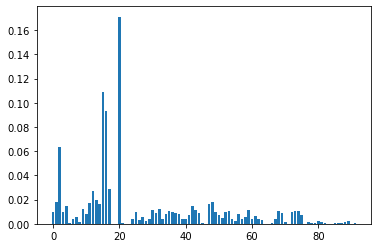

In [49]:
features_dt = dt.feature_importances_
print(features_dt)
plt.bar(x = range(len(features_dt)), height=features_dt)
plt.show()

In [50]:
#roc curve
y_proba_tree = dt.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_tree)

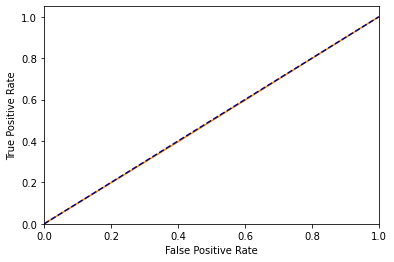

In [51]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [52]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.4980859208847299

## Bagging

## a. Random Forest Classifier
Instead of having one decision tree, we make more random trees and average their output.

In [53]:
#Random Forest classifier model
rf=RandomForestClassifier(random_state=1, n_estimators=500)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [54]:
#printing the accuracy score
print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6480221182475542


In [55]:
#score of training set using cross_val_score
cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

array([0.65640394, 0.75410509, 0.80541872, 0.83045977, 0.81609195])

In [56]:
#predection on the train set and confusion matrix
#cross_val_predict performs k-fold cross-validation but instead of returning evaluation scores it return the prediction made in each fold.
y_train_pred=cross_val_predict(rf, X_train_scaled, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[4609, 1481],
       [1290, 4800]])

In [57]:
#predection on the test set and confusion matrix
y_pred_rf=rf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_rf)

array([[1960,  391],
       [1264, 1087]])

In [58]:
#classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

   high_risk       0.61      0.83      0.70      2351
    low_risk       0.74      0.46      0.57      2351

    accuracy                           0.65      4702
   macro avg       0.67      0.65      0.64      4702
weighted avg       0.67      0.65      0.64      4702



[1.64175246e-02 3.36047005e-02 3.07032294e-02 1.42239163e-02
 1.54887781e-02 2.97922850e-03 4.27051795e-03 8.55840612e-03
 1.33532005e-03 1.51577257e-02 1.16142472e-02 2.95307776e-02
 2.99764667e-02 4.53332754e-02 4.48443196e-02 5.25173382e-02
 4.98329797e-02 1.62671260e-02 0.00000000e+00 0.00000000e+00
 9.97444637e-02 6.56760511e-04 0.00000000e+00 0.00000000e+00
 4.27868968e-03 1.34563223e-02 4.63160385e-03 6.58760719e-03
 4.03294385e-03 6.17692505e-03 1.18528253e-02 1.31099214e-02
 1.40812113e-02 5.12304140e-03 7.78349300e-03 1.53878110e-02
 1.33159958e-02 1.54529099e-02 5.98482161e-03 6.83047428e-03
 7.85674268e-03 9.78167759e-03 1.39355711e-02 1.55873811e-02
 1.40840046e-02 2.93482835e-04 0.00000000e+00 1.54613564e-02
 1.62359542e-02 1.18244670e-02 1.00680524e-02 5.67200574e-03
 1.29851695e-02 1.18672718e-02 3.62464457e-03 7.08920963e-03
 7.86624182e-03 7.36513040e-03 8.69878830e-03 1.01283162e-02
 8.34738211e-03 9.97869361e-03 7.97169822e-03 8.66230546e-03
 0.00000000e+00 0.000000

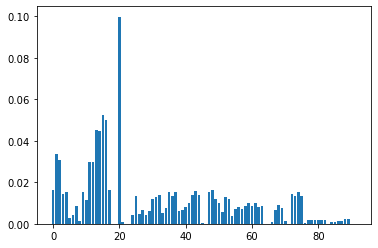

In [59]:
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

In [60]:
#roc curve
y_proba_forest = rf.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_forest)

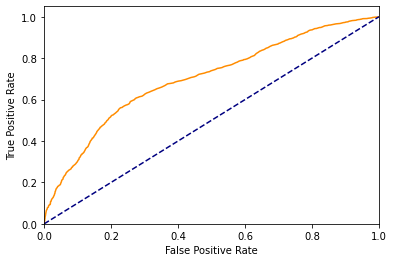

In [61]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [62]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.7009684467780347

### Tuning hyperparamaters  using Randomized Search CV

In [46]:
#### Using RandomizedSearchCV
param_rand = {
    'C' : np.arange(0, 100, 1),
    'gamma': np.arange(0, 0.01, .0001),
}
rand_rf = RandomizedSearchCV(rf, param_rand, cv=3, n_iter=100, random_state=1, verbose=1, n_jobs=-1)

In [47]:
rand_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.005]},
             verbose=1)

In [49]:
# List the best parameters for this dataset
print(rand_rf.best_params_)

{'C': 5, 'gamma': 0.0001}


In [50]:
# List the best score
print(rand_rf.best_score_)

0.7067323481116584


In [52]:
#best estimator
rf_b=rand_rf.best_estimator_
rf_b

SVC(C=5, gamma=0.0001, kernel='linear')

In [57]:
# Score the hypertuned model on the test dataset
rf_b.score(X_test_scaled, y_test)

0.735431731178222

In [54]:
# Make predictions with the hypertuned model
pred_rf = rf_b.predict(X_test_scaled)
confusion_matrix(y_test, pred_rf)

array([[1512,  839],
       [ 405, 1946]])

In [55]:
#classification report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

   high_risk       0.79      0.64      0.71      2351
    low_risk       0.70      0.83      0.76      2351

    accuracy                           0.74      4702
   macro avg       0.74      0.74      0.73      4702
weighted avg       0.74      0.74      0.73      4702



## b. Extremely Random Trees
Changing the behavior of the decision trees so that they randomly choose their splits

In [63]:
et = ExtraTreesClassifier(random_state=1, n_estimators=500)
et.fit(X_train_scaled, y_train)

ExtraTreesClassifier(n_estimators=500, random_state=1)

In [64]:
#printing the accuracy score
print(f'Training Score: {et.score(X_train_scaled, y_train)}')
print(f'Testing Score: {et.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.5616758826031476


In [65]:
#predection on the test set and confusion matrix
y_pred_et=et.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_et)

array([[1436,  915],
       [1146, 1205]])

In [66]:
#classification report
print(classification_report(y_test, y_pred_et))

              precision    recall  f1-score   support

   high_risk       0.56      0.61      0.58      2351
    low_risk       0.57      0.51      0.54      2351

    accuracy                           0.56      4702
   macro avg       0.56      0.56      0.56      4702
weighted avg       0.56      0.56      0.56      4702



[0.01600107 0.03540028 0.02068486 0.01212362 0.01255586 0.00776396
 0.01101582 0.0114585  0.00546554 0.01225651 0.01176191 0.02125612
 0.02090438 0.03055924 0.03055292 0.02855789 0.03708593 0.01417865
 0.         0.         0.04140359 0.00240016 0.         0.
 0.00776113 0.01157247 0.01103143 0.01150135 0.0105354  0.01186606
 0.01187661 0.0114436  0.01286715 0.01120288 0.012909   0.01290483
 0.01263438 0.01293985 0.01211667 0.01211123 0.01227896 0.0134272
 0.01182413 0.01296672 0.01273849 0.00087214 0.         0.0132648
 0.01390417 0.01264285 0.01257188 0.01091592 0.01242213 0.01437716
 0.00872184 0.0117618  0.0117489  0.01147388 0.0115683  0.01208937
 0.01149101 0.01171936 0.01175035 0.01142071 0.         0.
 0.00321407 0.01234736 0.01215846 0.01286414 0.00549558 0.
 0.01177573 0.01158606 0.01294428 0.01185346 0.0006376  0.00650856
 0.0054115  0.00638481 0.00771554 0.00773449 0.00584826 0.
 0.00406623 0.00424654 0.0053567  0.00530415 0.00371296 0.00400252
 0.00010817 0.00010993]


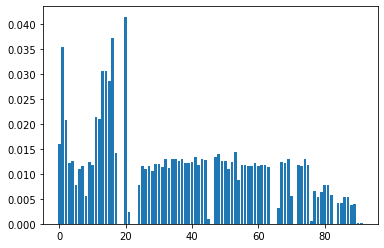

In [67]:
features_et = et.feature_importances_
print(features_et)
plt.bar(x = range(len(features_et)), height=features_et)
plt.show()

In [68]:
#roc curve
y_proba_rand_tree = et.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_rand_tree)

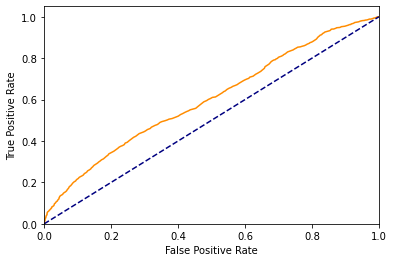

In [69]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [70]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.6001901324015536

## Bosting
In Bosting each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [71]:
ab = AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1)
ab.fit(X_train_scaled, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=1)

In [72]:
#printing the accuracy score
print(f'Training Score: {ab.score(X_train_scaled, y_train)}')
print(f'Testing Score: {ab.score(X_test_scaled, y_test)}')

Training Score: 0.7564039408866995
Testing Score: 0.726286686516376


In [73]:
#predection on the test set and confusion matrix
y_pred_ab=ab.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_ab)

array([[1797,  554],
       [ 733, 1618]])

In [74]:
#classification report
print(classification_report(y_test, y_pred_ab))

              precision    recall  f1-score   support

   high_risk       0.71      0.76      0.74      2351
    low_risk       0.74      0.69      0.72      2351

    accuracy                           0.73      4702
   macro avg       0.73      0.73      0.73      4702
weighted avg       0.73      0.73      0.73      4702



[0.    0.035 0.125 0.    0.    0.    0.    0.    0.    0.    0.    0.01
 0.025 0.02  0.04  0.25  0.165 0.08  0.    0.    0.135 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.005 0.02
 0.    0.    0.005 0.    0.005 0.02  0.    0.    0.    0.    0.    0.
 0.01  0.005 0.    0.    0.005 0.015 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.005 0.    0.    0.    0.
 0.005 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.005 0.01  0.    0.   ]


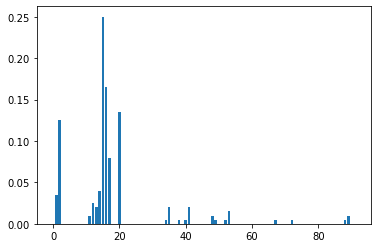

In [75]:
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

In [76]:
#roc curve
y_proba_ab = ab.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_ab)

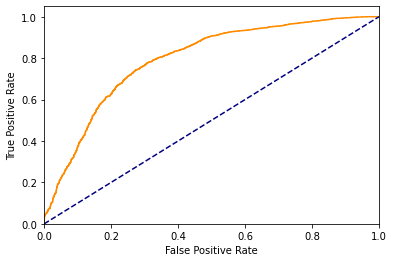

In [77]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [78]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.7926496611937942

In [79]:
def model_tester(model, X_train_scaled, X_test_scaled,y_train, y_test):
    clf = model.fit(X_train_scaled, y_train)
    y_pred=clf.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    
model_tester(AdaBoostClassifier(random_state=1, n_estimators=100), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=500, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=1000, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=2000, learning_rate=0.1), X_train_scaled, X_test_scaled,y_train, y_test)

              precision    recall  f1-score   support

   high_risk       0.64      0.56      0.60      2351
    low_risk       0.61      0.69      0.65      2351

    accuracy                           0.62      4702
   macro avg       0.63      0.62      0.62      4702
weighted avg       0.63      0.62      0.62      4702

Training Score: 0.7808702791461413
Testing Score: 0.6246278179498086
              precision    recall  f1-score   support

   high_risk       0.63      0.54      0.58      2351
    low_risk       0.60      0.68      0.64      2351

    accuracy                           0.61      4702
   macro avg       0.61      0.61      0.61      4702
weighted avg       0.61      0.61      0.61      4702

Training Score: 0.7951559934318555
Testing Score: 0.6097405359421523
              precision    recall  f1-score   support

   high_risk       0.71      0.76      0.74      2351
    low_risk       0.74      0.69      0.72      2351

    accuracy                           0.73 

## Trying to improve score by selecting important features based on Adaboster Classifier


In [115]:
sel = SelectFromModel(ab)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=AdaBoostClassifier(learning_rate=0.1,
                                             n_estimators=200, random_state=1))

In [116]:
sel.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [117]:
X_train_sel=sel.transform(X_train_dumy)
X_test_sel=sel.transform(X_test_dumy)

scaler = StandardScaler().fit(X_train_sel)
X_selected_train_scaled = scaler.transform(X_train_sel)
X_selected_test_scaled = scaler.transform(X_test_sel)


### Logistic Regression after select model

In [118]:
lr_s = LogisticRegression()
lr_s.fit(X_selected_train_scaled, y_train)

LogisticRegression()

In [119]:
#before model selection
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

Training Score: 0.710919540229885
Testing Score: 0.7598894087622289


In [120]:
#after model selection
print(f'Training Score: {lr_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7094417077175698
Testing Score: 0.7888132709485325


### KNeighborsClassifier after select model

In [121]:
knn_s=KNeighborsClassifier(n_neighbors=3)
knn_s.fit(X_selected_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [122]:
#before model selection
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')

Training Score: 0.7010673234811166
Testing Score: 0.5618885580603998


In [123]:
#after model selection
print(f'Training Score: {knn_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {knn_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.843431855500821
Testing Score: 0.5559336452573373


### SVC after select model

In [124]:
# Support vector machine linear classifier
svc_s=SVC(kernel='linear')
svc_s.fit(X_selected_train_scaled, y_train)

SVC(kernel='linear')

In [125]:
#before model selection
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

Training Score: 0.7233169129720853
Testing Score: 0.7528711186729051


In [126]:
#after model selection
print(f'Training Score: {svc_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {svc_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7118226600985221
Testing Score: 0.7813696299447044


### Decision Tree after select model

In [127]:
dt_s = DecisionTreeClassifier()
dt_s.fit(X_selected_train_scaled, y_train)

DecisionTreeClassifier()

In [128]:
#before model selection
print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.4980859208847299


In [129]:
#after model selection
print(f'Training Score: {dt_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {dt_s.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.4683113568694173
